In [1]:
# Group Member: 
#  Name               Student ID 
#  Jufeng Yang        20125011
#  Xingda Zhou        19107471
#  Zhongen Qin        19107579

# Import useful libries.
import imutils
import numpy as np
import cv2
import scipy.fftpack as fft
from matplotlib import pyplot as plt
from skimage.transform import rotate

Original Sinogram


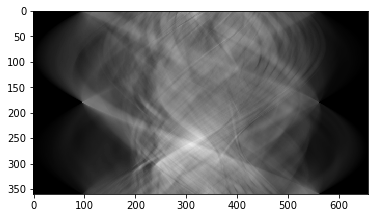

(360, 658)


In [2]:
# Check the Sinogram.
print("Original Sinogram")
sinogram2 = imutils.imread('sinogram.png')
imutils.imshow(sinogram2)
print(sinogram2.shape)

#Using the openCV to check the Sinogram.
sinogram = cv2.imread('sinogram.png')
cv2.imshow('Original Sinogram',sinogram)

cv2.waitKey(0)
# closing all open windows
cv2.destroyAllWindows()

The red channel sinogram:


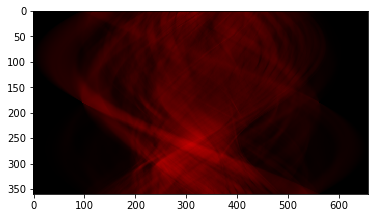

The green channel sinogram:


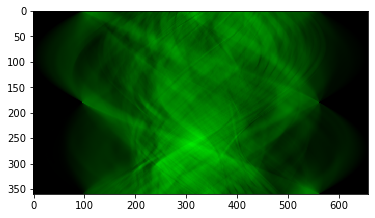

The blue channel sinogram:


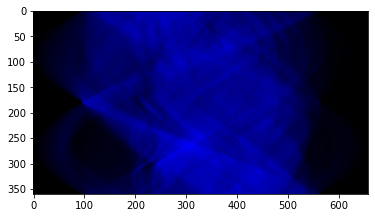

In [88]:
#Show the three channels of the original pictures
print("The red channel sinogram:")
R = imutils.getChannel(sinogram, 'R');
imutils.imshow(R)

print("The green channel sinogram:")
R = imutils.getChannel(sinogram, 'G');
imutils.imshow(R)

print("The blue channel sinogram:")
R = imutils.getChannel(sinogram, 'B');
imutils.imshow(R)

In [89]:
def creat_1_D_Sinogram(sinogram, color):
    if color == 'red':
        sinogram_red = sinogram
        sinogram_red[:,:,0] = 0
        sinogram_red[:,:,1] = 0
        cv2.imshow('Sinogram Red', sinogram_red)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        #cv2.imwrite('Sinogram_red.png', sinogram_red)
    elif color == 'blue':
        sinogram_bule = sinogram
        sinogram_bule[:,:,1] = 0
        sinogram_bule[:,:,2] = 0
        cv2.imshow('Sinogram Blue', sinogram_bule)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        #cv2.imwrite('Sinogram_bule.png', sinogram_bule)
    elif color == 'green':   
        sinogram_green = sinogram
        sinogram_green[:,:,0] = 0
        sinogram_green[:,:,2] = 0
        cv2.imshow('Sinogram Green', sinogram_green)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        #cv2.imwrite('Sinogram_green.png', sinogram_green)
    else:
        print("Wrong parameter")

creat_1_D_Sinogram(sinogram, 'red')
#creat_1_D_Sinogram(sinogram, 'blue')
#creat_1_D_Sinogram(sinogram, 'green')


def creat_1_D_Grey_Sinogram(sinogram, color):
    sinogram_bule,sinogram_green,sinogram_red = cv2.split(sinogram)
    if color == 'red':
        cv2.imshow('Sinogram Red Grey', sinogram_red)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.imwrite('Sinogram_red_grey.png', sinogram_red)
    elif color == 'blue':
        cv2.imshow('Sinogram Blue Grey', sinogram_bule)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.imwrite('Sinogram_bule_grey.png', sinogram_bule)
    elif color == 'green':   
        cv2.imshow('Sinogram Green Grey', sinogram_green)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.imwrite('Sinogram_green_grey.png', sinogram_green)
    else:
        print("Wrong parameter")

creat_1_D_Grey_Sinogram(sinogram, 'blue')
creat_1_D_Grey_Sinogram(sinogram, 'red')
creat_1_D_Grey_Sinogram(sinogram, 'green')

In [3]:
#Radon transform method - turns an image into a sinogram (Not used for reconstruction - this
#is how the original sinogram was generated

def radon(image, steps):
    #Build the Radon Transform using 'steps' projections of 'image'. 
    projections = []        ## Accumulate projections in a list.
    dTheta = -180.0 / steps ## Angle increment for rotations.
    
    for i in range(steps):
        projections.append(rotate(image, i*dTheta).sum(axis=0))
    
    return np.vstack(projections) # Return the projections as a sinogram

In [4]:
#Translate the sinogram to the frequency domain using Fourier Transform
def fft_translate(projs):
    #Build 1-d FFTs of an array of projections, each projection 1 row of the array.
    return fft.rfft(projs, axis=1)

In [5]:
#Filter the projections using a ramp filter
def ramp_filter(ffts):
    #Ramp filter a 2-d array of 1-d FFTs (1-d FFTs along the rows).
    ramp = np.floor(np.arange(0.5, ffts.shape[1]//2 + 0.1, 0.5))
    return ffts * ramp

In [6]:
#Return to the spatial domain using inverse Fourier Transform
def inverse_fft_translate(operator):
    return fft.irfft(operator, axis=1)


In [7]:
#Reconstruct the image by back projecting the filtered projections (UNFINISHED)
def back_project(operator):
    laminogram = np.zeros((operator.shape[1],operator.shape[1]))
    dTheta = 180.0 / operator.shape[0]
    for i in range(operator.shape[0]):
        temp = np.tile(operator[i],(operator.shape[1],1))
        temp = rotate(temp, dTheta*i)
        laminogram += temp
    return laminogram

Red channel picture:


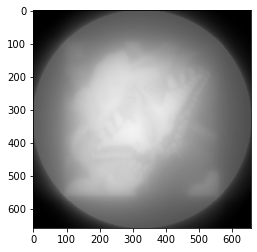

Blue channel picture:


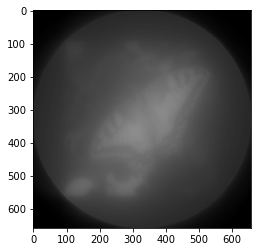

Green channel picture:


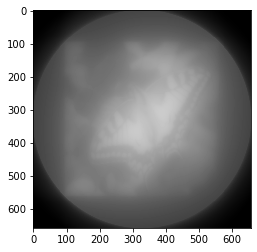

The merged pictrue:


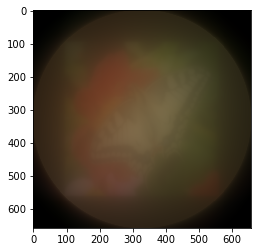

In [8]:
# NO ANY FILTERS RECONSTRUCTION.
# Reconstruct without any filter.
# Reconstruct using the grey pictures.
sino_bule = imutils.imread('Sinogram_bule_grey.png')
Reconstruct_nofilter_blue = back_project(sino_bule)

sino_red = imutils.imread('Sinogram_red_grey.png')
Reconstruct_nofilter_red = back_project(sino_red)

sino_green = imutils.imread('Sinogram_green_grey.png')
Reconstruct_nofilter_green = back_project(sino_green)

# Merge the 3 channels picture into a picture.
Reconstruct_nofilter = np.dstack((Reconstruct_nofilter_red, Reconstruct_nofilter_green, Reconstruct_nofilter_blue))
#Normalize the picture to avoid picture become too bright.
Reconstruct_nofilter = cv2.normalize(Reconstruct_nofilter, 0, 255, cv2.NORM_MINMAX)

# Show all single channel pictures and finnal result.
print("Red channel picture:")
imutils.imshow(Reconstruct_nofilter_red)

print("Blue channel picture:")
imutils.imshow(Reconstruct_nofilter_blue)

print("Green channel picture:")
imutils.imshow(Reconstruct_nofilter_green)

print("The merged pictrue:")
imutils.imshow(Reconstruct_nofilter)


The Blue fft result:


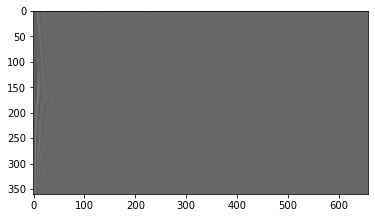

The Red fft result:


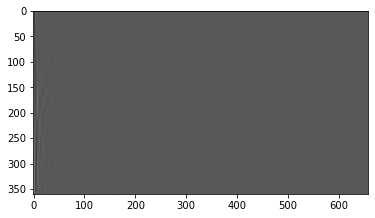

The Green fft result:


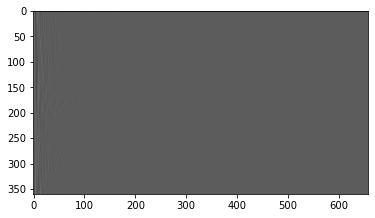

In [10]:
# THROUGH THE FFT TRANS AND THE RAMP FILTER.

# Read three channel grey pictures from PC
sino_blue = imutils.imread('Sinogram_bule_grey.png')
sino_red = imutils.imread('Sinogram_red_grey.png')
sino_green = imutils.imread('Sinogram_green_grey.png')

# Fourier fast tranform for the 3 channel pictures.
sino_blue_fft = fft_translate(sino_blue)
sino_red_fft = fft_translate(sino_red)
sino_green_fft = fft_translate(sino_green)

#Show the transform results(pictures).
print("The Blue fft result:")
imutils.imshow(sino_blue_fft)

print("The Red fft result:")
imutils.imshow(sino_red_fft)

print("The Green fft result:")
imutils.imshow(sino_green_fft)

#show the result use openCV.

cv2.imshow('sino_blue_fft',sino_blue_fft)
cv2.imshow('sino_red_fft',sino_red_fft)
cv2.imshow('sino_green_fft',sino_green_fft)

#cv2.imwrite('sino_blue_fft.png',sino_blue_fft)
#cv2.imwrite('sino_red_fft.png',sino_red_fft)
#cv2.imwrite('sino_green_fft.png',sino_green_fft)

cv2.waitKey(0)
cv2.destroyAllWindows()

Filtered FFT result:


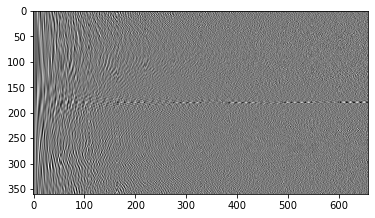

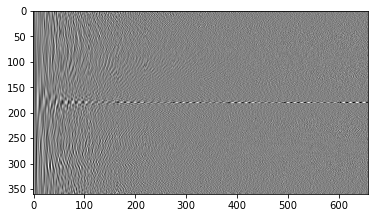

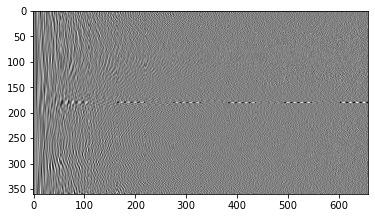

In [12]:
#Through the transformed picture after Ramp Filter
filtered_sino_blue_fft = ramp_filter(sino_blue_fft)
filtered_sino_red_fft = ramp_filter(sino_red_fft)
filtered_sino_green_fft = ramp_filter(sino_green_fft)

# Show the filtered results(pictures)
print("Filtered FFT result:")
imutils.imshow(filtered_sino_blue_fft)
imutils.imshow(filtered_sino_red_fft)
imutils.imshow(filtered_sino_green_fft)

# Show filtered pictures useing openCV
cv2.imshow('f_blue',filtered_sino_blue_fft)
cv2.imshow('f_red',filtered_sino_red_fft)
cv2.imshow('f_green',filtered_sino_green_fft)

#cv2.imwrite('f_blue.png',filtered_sino_blue_fft)
#cv2.imwrite('f_red.png',filtered_sino_red_fft)
#cv2.imwrite('f_green.png',filtered_sino_green_fft)

cv2.waitKey(0)
cv2.destroyAllWindows()

The Inverse FFT results: 


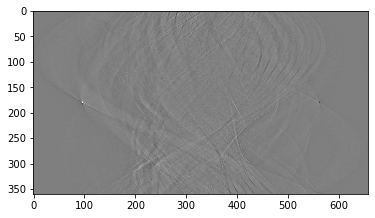

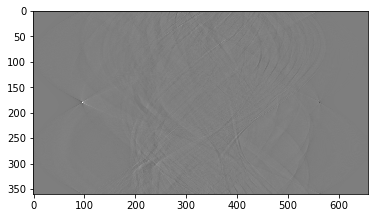

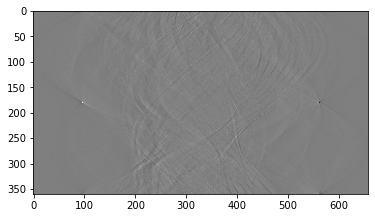

In [13]:
# Reverse FFT
filtered_sino_blue = inverse_fft_translate(filtered_sino_blue_fft)
filtered_sino_red = inverse_fft_translate(filtered_sino_red_fft)
filtered_sino_green = inverse_fft_translate(filtered_sino_green_fft)

# Show the reverse FFT results.
print("The Inverse FFT results: ")
imutils.imshow(filtered_sino_blue)
imutils.imshow(filtered_sino_red)
imutils.imshow(filtered_sino_green)

# Show the reverse FFT results using openCV.
cv2.imshow('new blue',filtered_sino_blue)
cv2.imshow('new red',filtered_sino_red)
cv2.imshow('new green',filtered_sino_green)

#cv2.imwrite('new blue.png',filtered_sino_blue)
#cv2.imwrite('new red.png',filtered_sino_red)
#cv2.imwrite('new green.png',filtered_sino_green)

cv2.waitKey(0)
cv2.destroyAllWindows()

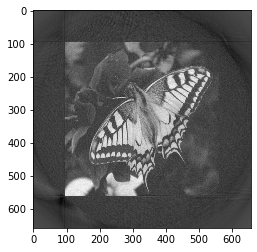

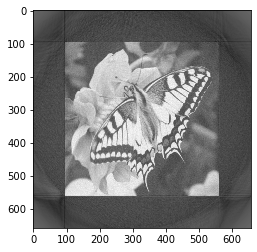

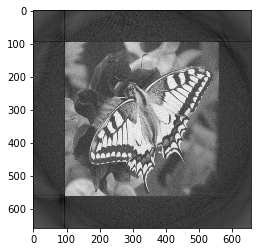

In [17]:
'''
# Reconstruct image using the filter 
filtered_blue = back_project(filtered_sino_blue)
filtered_red = back_project(filtered_sino_red)
filtered_green = back_project(filtered_sino_green)

# Show the 3 filtered grey pictures.
imutils.imshow(filtered_blue)
imutils.imshow(filtered_red)
imutils.imshow(filtered_green)

#cv2.imshow('Reconstruction blue',filtered_blue)
#cv2.imshow('Reconstruction red',filtered_red)
#cv2.imshow('Reconstruction green',filtered_green)

# Save the pictures using plt.
#plt.imsave("Blue channel result with ramp1.png", filtered_blue)
#plt.imsave("Red channel result with ramp1.png", filtered_red)
#plt.imsave("Green channel result with ramp1.png", filtered_green)

#cv2.imwrite("Blue channel result with ramp.png", filtered_blue)
#cv2.imwrite("Red channel result with ramp.png", filtered_red)
#cv2.imwrite("Green channel result with ramp.png", filtered_green)

cv2.waitKey(0)
cv2.destroyAllWindows()'''

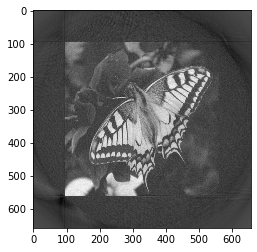

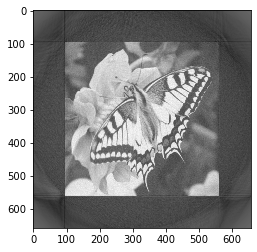

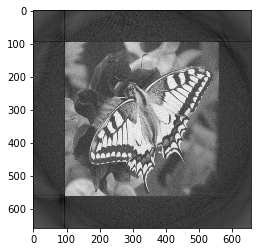

(658, 658, 3)


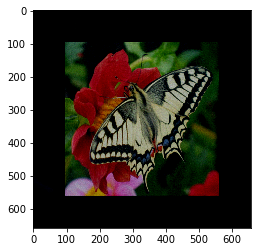

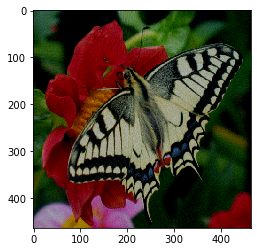

In [14]:
# Reconstruct image using the filter 
filtered_blue = back_project(filtered_sino_blue)
filtered_red = back_project(filtered_sino_red)
filtered_green = back_project(filtered_sino_green)

# Use last block generated reconstruct data.
Red_channel = filtered_red
Blue_channel = filtered_blue
Green_channel = filtered_green

# Show the data generated before.
imutils.imshow(Blue_channel)
imutils.imshow(Red_channel)
imutils.imshow(Green_channel)

# Merge those 3 channel into a BGR graph
Reconstruct_nofilter_with_filtered = np.dstack((Red_channel, Green_channel, Blue_channel))
print(Reconstruct_nofilter_with_filtered.shape)
Reconstruct_nofilter_with_filtered = cv2.normalize(Reconstruct_nofilter_with_filtered, 0, 255, cv2.NORM_MINMAX)
Reconstruct_nofilter_with_filtered = np.clip(Reconstruct_nofilter_with_filtered, 0,1)

Reconstruct_nofilter_with_filtered_crop = Reconstruct_nofilter_with_filtered[97:561, 97:561, :]

# Show the reconstruct filtered fictures(Color)
imutils.imshow(Reconstruct_nofilter_with_filtered)
imutils.imshow(Reconstruct_nofilter_with_filtered_crop)

#cv2.imshow('Reconstruct_nofilter_with_filtered', Reconstruct_nofilter_with_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

Hamming-Windowed reconstructed image


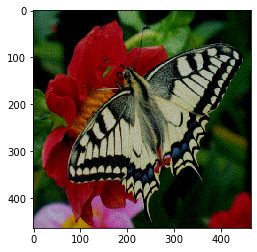

'hamming_R = window * Red_channel\nhamming_G = window * Green_channel\nhamming_B = window * Blue_channel\nhamming_new = np.dstack((hamming_R, hamming_G, hamming_B))\nhamming_new = cv2.normalize(new, 0, 255, cv2.NORM_MINMAX)\nimutils.imshow(hamming_new)'

In [92]:
# Using the Hamming filter to process pictures.
print("Hamming-Windowed reconstructed image")
window = np.hamming(658)

Hamming_filtered_sino_blue_fft = window * sino_blue_fft
Hamming_filtered_sino_red_fft = window * sino_red_fft
Hamming_filtered_sino_green_fft = window * sino_green_fft

# Reverse FFT
Hamming_filtered_sino_blue = inverse_fft_translate(Hamming_filtered_sino_blue_fft)
Hamming_filtered_sino_red = inverse_fft_translate(Hamming_filtered_sino_red_fft)
Hamming_filtered_sino_green = inverse_fft_translate(Hamming_filtered_sino_green_fft)

# Reconstruct image using the filter 
Hamming_filtered_blue = back_project(filtered_sino_blue)
Hamming_filtered_red = back_project(filtered_sino_red)
Hamming_filtered_green = back_project(filtered_sino_green)

# Merge all 3 channel pictures.
hamming_new = np.dstack((Hamming_filtered_red, Hamming_filtered_green, Hamming_filtered_blue))
hamming_new = cv2.normalize(new, 0, 255, cv2.NORM_MINMAX)
imutils.imshow(hamming_new)


'''hamming_R = window * Red_channel
hamming_G = window * Green_channel
hamming_B = window * Blue_channel
hamming_new = np.dstack((hamming_R, hamming_G, hamming_B))
hamming_new = cv2.normalize(new, 0, 255, cv2.NORM_MINMAX)
imutils.imshow(hamming_new)'''